In [440]:
import numpy as np
import math

# Input

In [441]:
def f(x: float, y: float):  # y' = f(x, y)
    return x*y

STEP = 3
START_X = 0
START_Y = 1
END_X = 5
H = 0.01

# Process

In [442]:
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt


def plot_polynomial(a: float, b: float, coeff: list|np.ndarray):
    polynomial = Polynomial(coeff)

    x = np.linspace(a, b, 100)
    y = [polynomial(i) for i in x]

    plot(x, y)


def plot(x: list|np.ndarray, y: list|np.ndarray):
    __set_axis()
    __plot(x, y)


def __plot(x, y):
    plt.plot(x, y)
    plt.show()


def __set_axis():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

In [443]:
def b(s: int, j: int):
    solution = [-i for i in range(s)]
    solution.remove(-j)
    integrand = np.poly1d(solution, r=True)
    integral = np.poly1d.integ(integrand)

    return pow(-1, j) / math.factorial(j) / math.factorial(s-j-1) * (integral(1) - integral(0))

In [444]:
b(3, 0)

1.9166666666666665

In [445]:
def euler_method(x0: float, y0: float, h: float, count: int):
    x = x0
    y = y0
    plot_x = [x0]
    plot_y = [y0]

    for _ in range(count):
        x += h
        y += f(x, y) * h

        plot_x.append(x)
        plot_y.append(y)
    
    return (plot_x, plot_y)

In [446]:
x, y = euler_method(START_X, START_Y, H, int((END_X-START_X) / H))
print(x.pop(), y.pop())

4.999999999999938 224384.96832101227


In [447]:
def adams_bashforth():
    x, y = euler_method(START_X, START_Y, H, STEP)
    
    while x[-1]+H < END_X:
        inc = 0
        for j in range(STEP):
            inc += b(STEP, STEP-j-1)*f(x[j-STEP], y[j-STEP])
        
        y.append(y[-1] + H*inc)
        x.append(x[-1] + H)

    return (x, y)

In [448]:
x, y = adams_bashforth()
print(x.pop(), y.pop())

4.999999999999938 268292.5322666458


# Output

In [449]:
def solution(x: float):
    return math.exp(x**2/2)

In [450]:
print(solution(END_X))

268337.2865208745


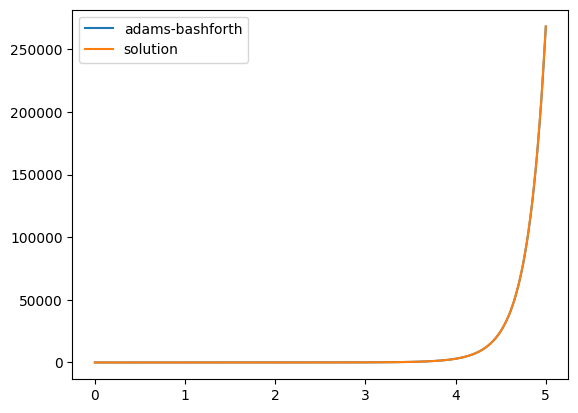

In [451]:
a_x, a_y = adams_bashforth()
s_x = np.linspace(START_X, END_X, 100)
s_y = [solution(i) for i in s_x]
plt.plot(a_x, a_y, label="adams-bashforth")
plt.plot(s_x, s_y, label="solution")
plt.legend()
plt.show()

Error of step 1:  20.35%
Error of step 2:  0.77%
Error of step 3:  0.02%
Error of step 4: -0.02%
Error of step 5: -0.02%
Error of step 6: -0.03%
Error of step 7: -0.03%
Error of step 8: -0.04%
Error of step 9: -0.04%


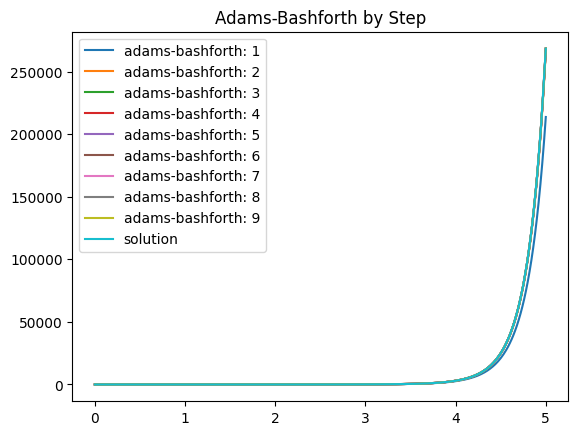

In [452]:
tmp = STEP

for i in range(1, 10):
    STEP = i
    a_x, a_y = adams_bashforth()
    plt.plot(a_x, a_y, label=f"adams-bashforth: {i}")
    print(f"Error of step {i}: {(solution(a_x[-1]) - a_y[-1]) / solution(a_x[-1]) * 100: .2f}%")

s_x = np.linspace(START_X, END_X, 100)
s_y = [solution(i) for i in s_x]
plt.title("Adams-Bashforth by Step")
plt.plot(s_x, s_y, label="solution")
plt.legend()
plt.plot()

STEP = tmp